# Unmanned Aircraft Systems (UAS) Obstacle Avoidance Integrating Safety Bound with Reinforcement Learning
Author: Jueming Hu, Arizona State University

Email: jueming.hu@asu.edu

## Module Description

This module demonstrates path planning for UAS obstacle avoidance using a **probabilistic dynamic anisotropic (DA) safety bound coupled with reinforcement learning (RL) methods**. The DA safety bound is influenced by UAS performance, weather condition, and uncertainties in UAS operations such as positioning error. 

A **new reward function** based on the operational DA safety bound concept enables trajectory optimization under risk-based dynamic separation criterion. A **Q-learning RL algorithm** is used to learn the optimal path plan with the DA safety bound reward function. A comparison of optimized trajectories around static obstacles is conducted to show the deconflict capability of the DA safety bound with RL methods. 

The detailed information can be found [here](https://arc.aiaa.org/doi/abs/10.2514/6.2020-1372).

## Installing the required Python packages

This code has been tested with Python 3.7. The required Python packages for this module are:
```gym```, ```itertools```, ```matplotlib```, ```numpy```, ```pandas```, ```collections```. All but the first one is standard to most Python distributions like in Anaconda. More information on the ```gym``` package is below. 
- **[```gym```]**(https://anaconda.org/conda-forge/gym)
    - The OpenAI Gym: A toolkit for developing and comparing your reinforcement learning agents.
    
In the Ubuntu or Anaconda terminal, execute ```conda install gym```. This will install the ```gym``` package. 

## Supplementary Python Modules
Several modular functions and Python classes were created to facilitate this work. They are contained in this repository and used in this Jupyter notebook. They are:
 - **```SafetyBound.py```**
     - Obtains the size of the safety bound as a function of UAV state
 - **```ObstacleAvoidanceENV.py```**
     - Defines RL environment, including transition model and reward function.
 - **```Q_learning.py```**
     - Contains the Q-learning algorithm
 - **```geometryCheck.py```**
     - Checks for potential collision within in DA safety bound
 - **```plotting.py```**
     - Provides utilities to visualize RL training process statistics and convergence
 - **```draw.py```**
     - Provides utilities to visualize optimized trajectories on grid. 
     
Theses modules will be called and used in subsequent steps. 

## Section 1: UAV Environment Setup
For the UAV environment, we use the ```UAVEnv``` class from the ```ObstacleAvoidanceENV``` module. To create an instance of ```UAVEnv```, we define the origin and destination and the presence of the safety bound.

### Step 1.1 Define the starting point and destination

In [1]:
origin = (49, 0)
destination=(0, 49)

### Step 1.2. Generate a ```UAVEnv``` without safety bound during training

In [2]:
from ObstacleAvoidanceENV import UAVEnv

uav_no_bound = UAVEnv(origin, destination, safetybound = False)

### Step 1.3. Generate a ```UAVEnv``` with safety bound during training

In [3]:
uav_with_bound = UAVEnv(origin, destination, safetybound = True)

## Section 2: Case Studies 
## Case Study I: Path planning without safety bound

### Step 1.  Optimize path with Q-learning

In [4]:
from Q_learning import q_learning
Q, stats, trajectories = q_learning(uav_no_bound, num_episodes = 3000)

Episode 3000/3000.

### Step 2.  Save the learned trajectory (output of Q-learning)

In [5]:
import numpy as np
with open('multiPoly_withoutbound.txt', 'w') as outfile:
    outfile.write('# Array shape: {0}\n'.format(trajectories.shape))
    for data_slice in trajectories:
        np.savetxt(outfile, data_slice, fmt='%-7.2f')
        outfile.write('# New slice\n')

### Step 3. Visualization of the learned trajectory

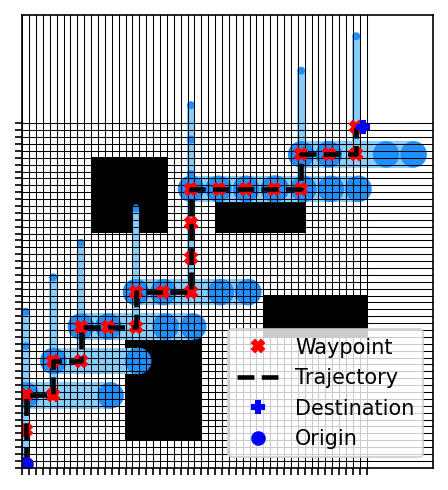

In [6]:
import matplotlib.pyplot as plt
from ObstacleAvoidanceENV import polysize1
from ObstacleAvoidanceENV import polysize2
from ObstacleAvoidanceENV import polysize3
from ObstacleAvoidanceENV import polysize4
from draw import trajectory

trajectories1 = np.loadtxt('multiPoly_withoutbound.txt')
trajectories1 = trajectories1.astype(int)
trajectories1 = trajectories1.reshape((1, 23, 3))
plt.rcParams['figure.dpi'] = 150
trajectory(trajectories1[0,:,0], (50,50), polysize1, polysize2, polysize3, polysize4)

### Step 4. Visualization of the RL process

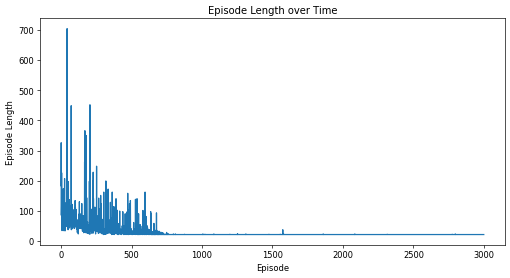

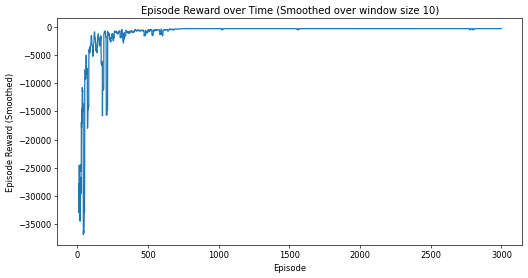

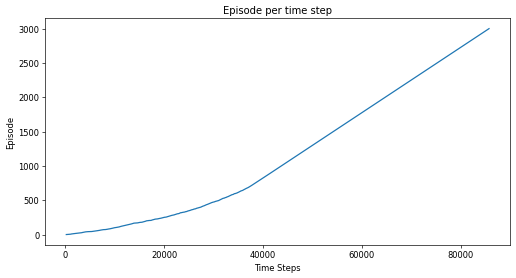

(<Figure size 600x300 with 1 Axes>,
 <Figure size 600x300 with 1 Axes>,
 <Figure size 600x300 with 1 Axes>)

In [7]:
import plotting

plt.rcParams['figure.dpi'] = 60
plotting.plot_episode_stats(stats)

## Case Study 2: Path Planning with DA Safety Bound

### Step 1. Optimize Path with Q-learning

In [8]:
Q, stats, trajectories = q_learning(uav_with_bound, num_episodes = 3000)

Episode 3000/3000.

### Step 2. Save the learned trajectory (output of Q-learning)

In [9]:
with open('multiPoly_withbound.txt', 'w') as outfile:
    outfile.write('# Array shape: {0}\n'.format(trajectories.shape))
    for data_slice in trajectories:
        np.savetxt(outfile, data_slice, fmt='%-7.2f')
        outfile.write('# New slice\n')

### Step 3. Visualization of the learned trajectory

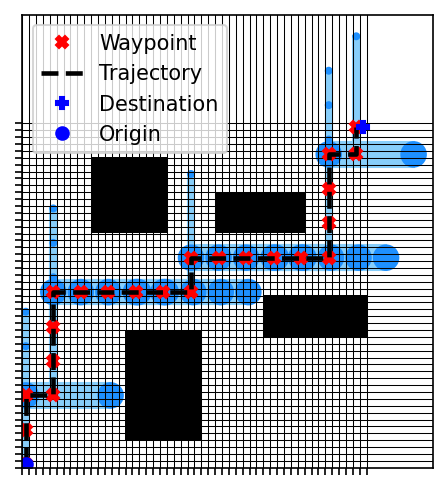

In [10]:
trajectories2 = np.loadtxt('multiPoly_withbound.txt')
trajectories2 = trajectories2.astype(int)
trajectories2 = trajectories2.reshape((1, 23, 3))
plt.rcParams['figure.dpi'] = 150
trajectory(trajectories2[0,:,0], (50,50), polysize1, polysize2, polysize3, polysize4)

### Step 4. Visualization of the RL learning process

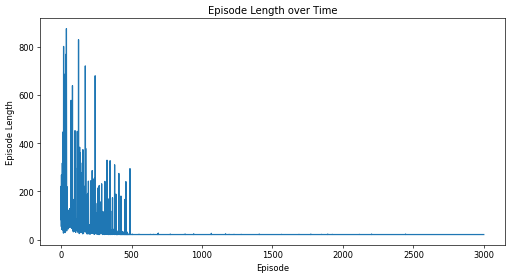

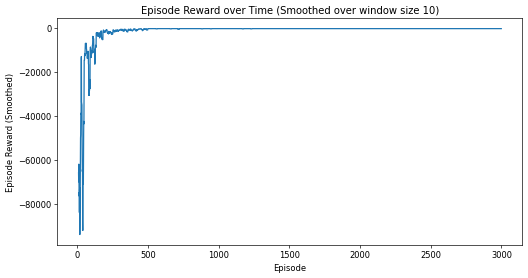

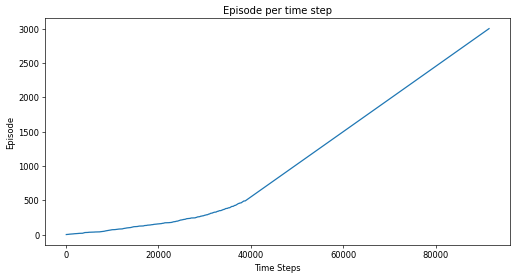

(<Figure size 600x300 with 1 Axes>,
 <Figure size 600x300 with 1 Axes>,
 <Figure size 600x300 with 1 Axes>)

In [11]:
plt.rcParams['figure.dpi'] = 60
plotting.plot_episode_stats(stats)

## Section 3: Comparison of Trajectories with and without Safety Bound

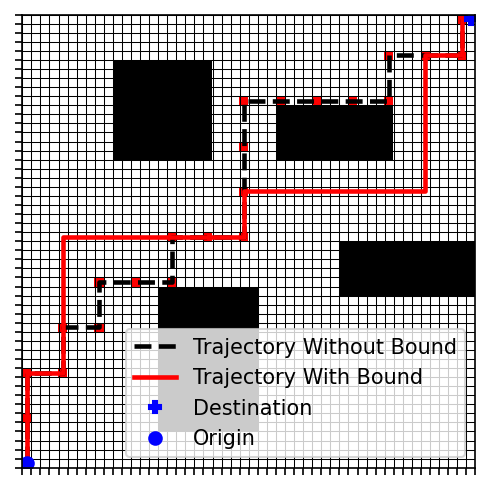

In [12]:
from draw import trajectory2

plt.rcParams['figure.dpi'] = 150
trajectory2(trajectories1[0,:,0], trajectories2[0,:,0], (50,50), polysize1, polysize2, polysize3, polysize4)